In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [11]:
#LightGBM Uygulaması
import lightgbm as lgb

In [2]:
train_data = pd.read_csv('train_data_swc.csv')
test_data = pd.read_csv('test_data_swc.csv')
example_data = pd.read_csv('example.csv')

In [3]:
print('number of data points in the train data: ' , len(train_data))
print('number of data points in the test data: ' , len(test_data))

number of data points in the train data:  62500
number of data points in the test data:  150000


In [4]:
train_data.head(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,y
0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.2,0.8,0.0,0.0,0.0,0.0,0.6,0.2,0.0,0.0,...,0.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.4,0.0,0.0,3.2,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.4,0.0,0.0,0.0,0.4,0.0,0.0,0.6,...,0.0,0.0,0.0,0.6,0.2,0.0,0.0,0.2,0.0,9


In [6]:
test_data.head(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108
0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,0.2,0.0,0.0,0.2,0.0
2,0.2,0.0,0.2,0.0,0.0,0.0,0.4,0.0,0.4,0.4,...,0.0,0.0,0.2,0.0,0.0,0.0,0.6,0.0,0.0,4.4
3,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.2,0.0,2.8,0.0,0.2,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2


## Correlation among Features

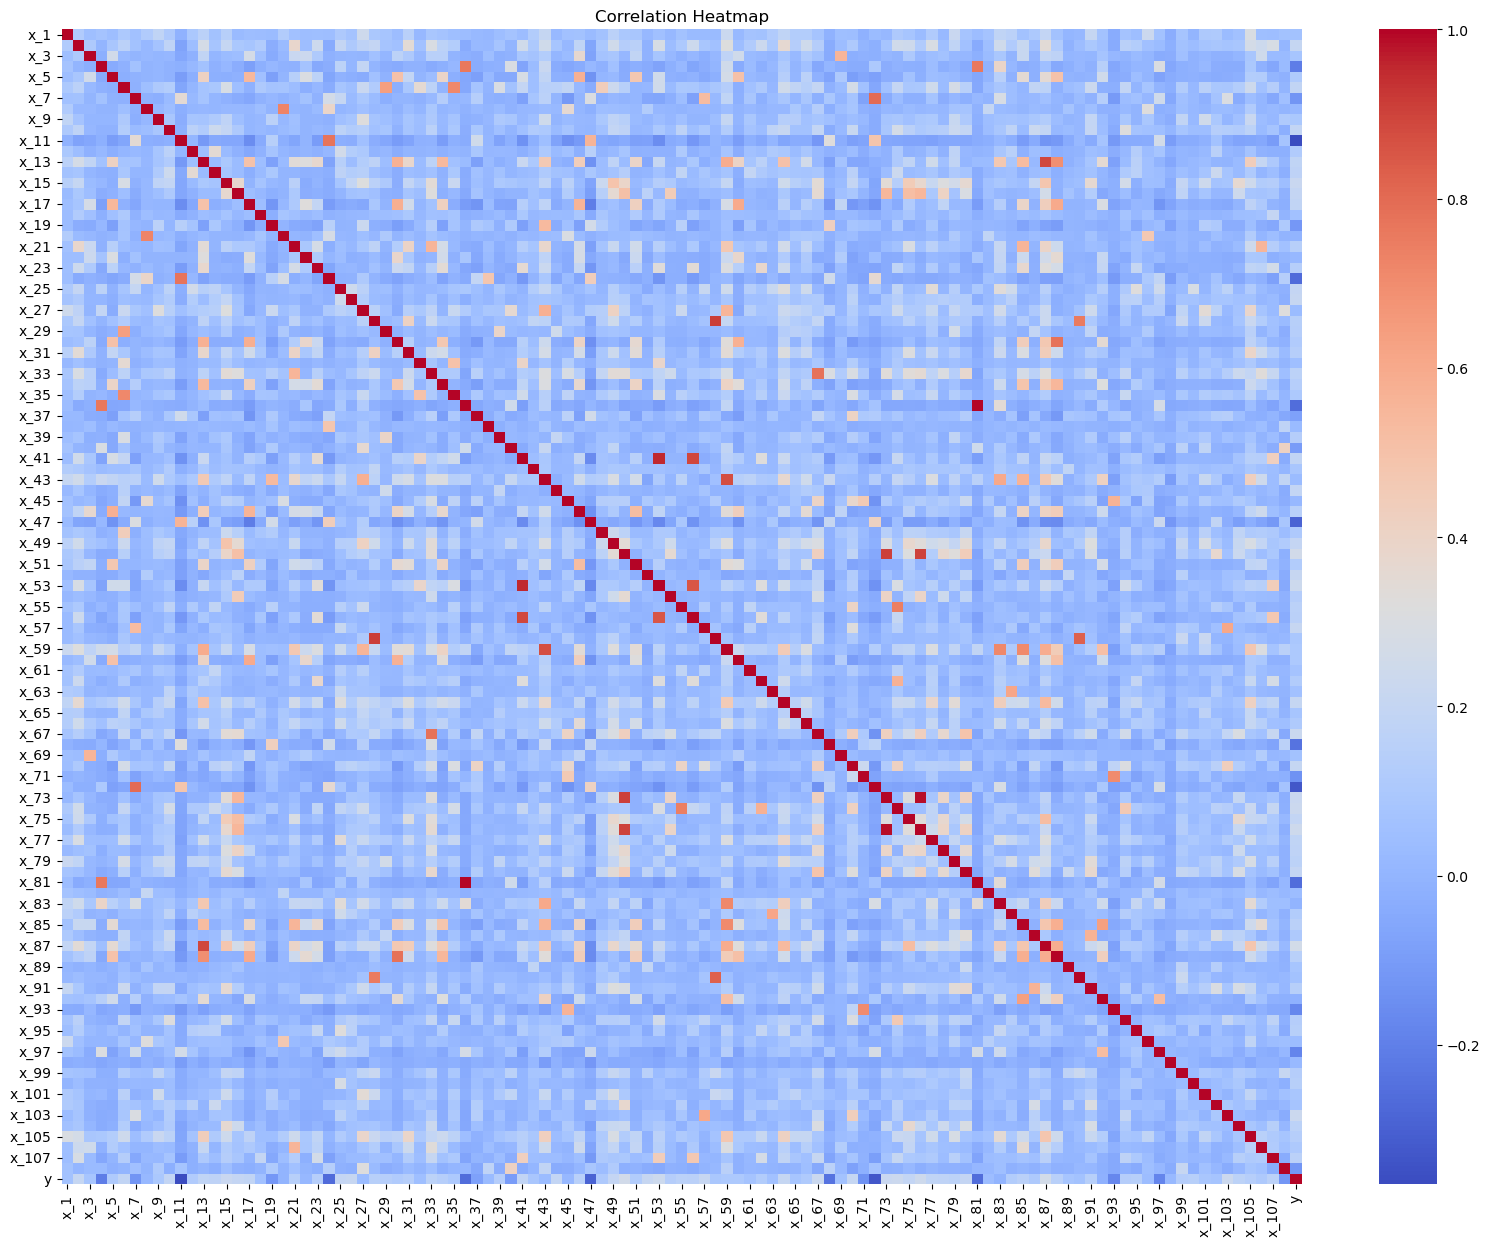

In [4]:
corr_matrix = train_data.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

## Decision Tree Model

In [5]:
X = train_data.drop(['y'], axis = 1)
y = train_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 108) (12500, 108) (50000,) (12500,)


In [8]:
model = DecisionTreeClassifier(random_state = 10, max_depth = 18)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted_train = model.predict(X_train)

In [9]:
accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)
print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')


Accuracy_train: 0.81106
Accuracy_test: 0.72152


## LightGBM Model

In [13]:


lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_acc_test = accuracy_score(y_test, lgb_model.predict(X_test))
lgb_acc_train = accuracy_score(y_train, lgb_model.predict(X_train))
print(f'Accuracy_train_lgb: {lgb_acc_train}')
print(f'Accuracy_test_lgb: {lgb_acc_test}')


Accuracy_train_lgb: 0.88738
Accuracy_test_lgb: 0.81632


In [7]:
print(model.feature_importances_)

[0.00175826 0.00209233 0.00161294 0.00449484 0.00017799 0.00253614
 0.00522285 0.01693595 0.00136308 0.00252299 0.05007348 0.0089955
 0.00322628 0.00228869 0.00123245 0.03850192 0.09235775 0.00084866
 0.0135198  0.00059536 0.00590291 0.00256445 0.01324512 0.00482886
 0.01780239 0.00259611 0.00329111 0.00426418 0.00872124 0.00117997
 0.00135634 0.00058723 0.00621242 0.00058085 0.00180078 0.042151
 0.01472623 0.00476604 0.00379168 0.00381893 0.143188   0.00123096
 0.00647317 0.01764721 0.0154573  0.0008525  0.01170438 0.00295783
 0.00219229 0.01238232 0.00014372 0.01113161 0.00227982 0.00142689
 0.00575236 0.00341736 0.00960065 0.02622252 0.00370713 0.00188588
 0.00069971 0.01981273 0.00315507 0.00175716 0.00130909 0.00202906
 0.00624958 0.00597263 0.00286761 0.0141267  0.01044149 0.01415603
 0.00999774 0.02012849 0.00161528 0.01715796 0.00299578 0.00340357
 0.00148765 0.00400281 0.00554466 0.00018225 0.00553925 0.00301491
 0.00103073 0.00813828 0.00285339 0.00104316 0.0025807  0.0029239

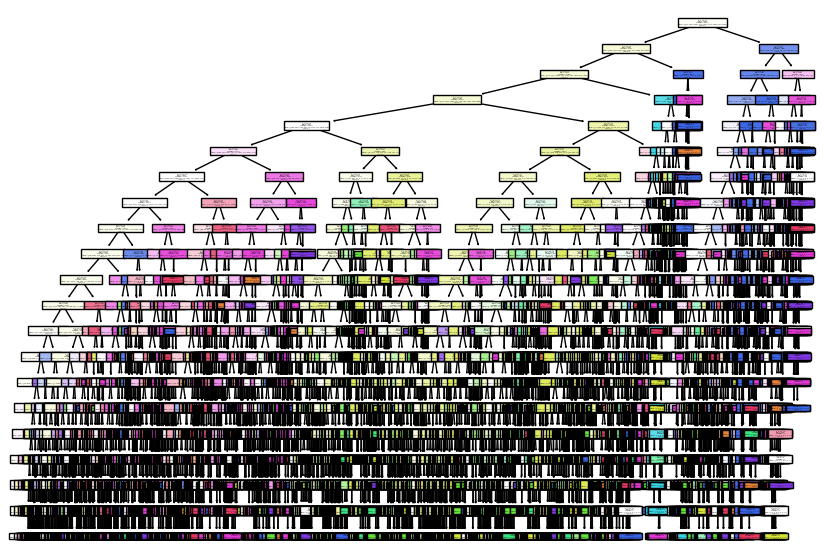

In [8]:
classes = [str(x) for x in train_data['y'].unique().tolist()]
fig = plt.figure(figsize = (20, ))
_ = tree.plot_tree(model, feature_names = X.columns.values.tolist(),
              class_names = classes, filled = True)
fig.savefig("decision_tree.png")